In [66]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation , MaxPool2D ,convolutional
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import backend as K 
from sklearn import metrics 

In [76]:
with open('trainX.pickle', 'rb') as f:
    X = list(pickle.load(f))
    X=np.array(X)

with open('trainY.pickle', 'rb') as f:
    y = list(pickle.load(f))
    y=np.array(y)
with open('testX.pickle', 'rb') as f:
    test = list(pickle.load(f))
    test=np.array(test)

In [77]:
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

#X=X/255
test=test.reshape(test.shape[0],test.shape[1],test.shape[2],1)

#test=test/255

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
model = Sequential()

model.add(convolutional.Conv2D(16, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
__________

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train,
                epochs=30,
               # batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.5685 - acc: 0.7922 - val_loss: 0.4108 - val_acc: 0.8462
Epoch 2/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3509 - acc: 0.8718 - val_loss: 0.3305 - val_acc: 0.8778
Epoch 3/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.2994 - acc: 0.8900 - val_loss: 0.3351 - val_acc: 0.8750
Epoch 4/30
48000/48000 [==============================] - 55s 1ms/step - loss: 0.2680 - acc: 0.9004 - val_loss: 0.3123 - val_acc: 0.8847
Epoch 5/30
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2407 - acc: 0.9116 - val_loss: 0.2859 - val_acc: 0.8953
Epoch 6/30
 1504/48000 [..............................] - ETA: 1:24 - loss: 0.1850 - acc: 0.9402

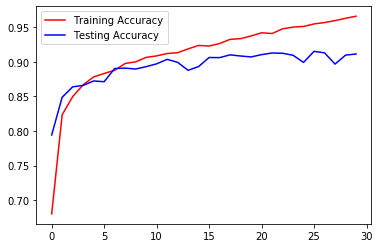

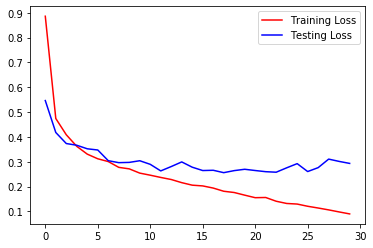

In [80]:
plt.figure()
plt.plot(hist.history['acc'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'b', label='Testing Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Testing Loss')
plt.legend()
plt.show()


In [81]:
result=model.predict(test)
result.shape

(10000, 10)

In [82]:
result=result.argmax(axis=1)
pickle.dump(result, open("result.pickle", "wb"))